# Import Libraries and data set

In [220]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


### Get the Data

In [221]:
df = pd.read_csv (r'.\dataset\healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**From the above we notice that "gender", "ever_married", "work_type", "Residence_type" and "smoking_status" are categorical data**

### Check basic info about the data set including missing value

**Below shows 5110 rows of records with 12 columns of variables**

In [222]:
print (df.shape) # To see the total no. of rows and columns

(5110, 12)


**Below an overview of the columns and its data type. The categorical data are classified under object Dtype. There are some missing values with bmi**

In [223]:
df.info()
# If a column contains numbers and NaNs (see below),
#  pandas will default to float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**There are 201 null records in the BMI column**

In [224]:
missing_values_count = df.isnull().sum()
missing_values_count

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Below gives us the statistical readings of the data**

In [225]:
df.describe() # will only work with data type that are numeric

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Data Analysis

**Get the unique values for each of the categorical data columns**

In [226]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [227]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [228]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [229]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [230]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

**Notice there is this "Other" under the gender column. To find out how many of such records**

In [231]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**The above shows there is only one such record**

The above info can also be retrieved using the Pandas profiling report


In [232]:
import pandas_profiling as pp
# pp.version.__version__
# pp.ProfileReport(df)

# Data Cleansing & Imputation

In [233]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [234]:
df.gender.value_counts() # shows that the record is being removed

Female    2994
Male      2115
Name: gender, dtype: int64

**Impute the missing values in the BMI column with its mean value**

In [235]:
bmi_mean=df["bmi"].mean()

df["bmi"].fillna(bmi_mean, inplace = True)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.80000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.89456,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.20000,Unknown,1


# Data Transformation / Features Engineering

**Next we will transform "gender", "ever_married" and "Residence_type into numerical format by adding a new column each, for our correlation analysis later**

In [236]:
# Bivariate transformation of column "gender"
# Female = 0
# Male = 1
# by adding a new column "gender_bool"

converted_gender = list(map(lambda i : 0 if i == "Female" else 1, df['gender'])) # type convert the map object right away
df.insert(loc=2, column="gender_bool", value=converted_gender)
df.head(10)


,id,gender,gender_bool,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,1,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,0,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
5,56669,Male,1,81.0,0,0,Yes,Private,Urban,186.21,29.00000,formerly smoked,1
6,53882,Male,1,74.0,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1
7,10434,Female,0,69.0,0,0,No,Private,Urban,94.39,22.80000,never smoked,1
8,27419,Female,0,59.0,0,0,Yes,Private,Rural,76.15,28.89456,Unknown,1
9,60491,Female,0,78.0,0,0,Yes,Private,Urban,58.57,24.20000,Unknown,1


In [237]:
# Bivariate transformation of column "ever_married"
# No = 0
# Yes = 1
# by adding a new column "Married_bool"

converted_married = list(map(lambda i : 0 if i == "No" else 1, df['ever_married'])) # type convert the map object right away
df.insert(loc=7, column="Married_bool", value=converted_married)
df.head(10)



,id,gender,gender_bool,age,hypertension,heart_disease,ever_married,Married_bool,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1,67.0,0,1,Yes,1,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,0,61.0,0,0,Yes,1,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,1,80.0,0,1,Yes,1,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,0,49.0,0,0,Yes,1,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,0,79.0,1,0,Yes,1,Self-employed,Rural,174.12,24.00000,never smoked,1
5,56669,Male,1,81.0,0,0,Yes,1,Private,Urban,186.21,29.00000,formerly smoked,1
6,53882,Male,1,74.0,1,1,Yes,1,Private,Rural,70.09,27.40000,never smoked,1
7,10434,Female,0,69.0,0,0,No,0,Private,Urban,94.39,22.80000,never smoked,1
8,27419,Female,0,59.0,0,0,Yes,1,Private,Rural,76.15,28.89456,Unknown,1
9,60491,Female,0,78.0,0,0,Yes,1,Private,Urban,58.57,24.20000,Unknown,1


In [238]:
# Bivariate transformation of column "Residence_type"
# Rural = 0
# Urban = 1
# by adding a new column "Residence_bool"

converted_residence = list(map(lambda i : 0 if i == "Rural" else 1, df['Residence_type'])) # type convert the map object right away
df.insert(loc=10, column="Residence_bool", value=converted_residence)
df.head(10)

,id,gender,gender_bool,age,hypertension,heart_disease,ever_married,Married_bool,work_type,Residence_type,Residence_bool,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1,67.0,0,1,Yes,1,Private,Urban,1,228.69,36.60000,formerly smoked,1
1,51676,Female,0,61.0,0,0,Yes,1,Self-employed,Rural,0,202.21,28.89456,never smoked,1
2,31112,Male,1,80.0,0,1,Yes,1,Private,Rural,0,105.92,32.50000,never smoked,1
3,60182,Female,0,49.0,0,0,Yes,1,Private,Urban,1,171.23,34.40000,smokes,1
4,1665,Female,0,79.0,1,0,Yes,1,Self-employed,Rural,0,174.12,24.00000,never smoked,1
5,56669,Male,1,81.0,0,0,Yes,1,Private,Urban,1,186.21,29.00000,formerly smoked,1
6,53882,Male,1,74.0,1,1,Yes,1,Private,Rural,0,70.09,27.40000,never smoked,1
7,10434,Female,0,69.0,0,0,No,0,Private,Urban,1,94.39,22.80000,never smoked,1
8,27419,Female,0,59.0,0,0,Yes,1,Private,Rural,0,76.15,28.89456,Unknown,1
9,60491,Female,0,78.0,0,0,Yes,1,Private,Urban,1,58.57,24.20000,Unknown,1


**Multivariate transformation using One-Hot Encoding for "work_type" and "smoking_status"**

In [239]:
one_hot = pd.get_dummies(df['work_type'])

# Join the encoded df
df = df.join(one_hot)


In [240]:
one_hot = pd.get_dummies(df['smoking_status'])

# Join the encoded df
df = df.join(one_hot)
df  

,id,gender,gender_bool,age,hypertension,heart_disease,ever_married,Married_bool,work_type,Residence_type,...,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,Male,1,67.0,0,1,Yes,1,Private,Urban,...,1,0,0,1,0,0,0,1,0,0
1,51676,Female,0,61.0,0,0,Yes,1,Self-employed,Rural,...,1,0,0,0,1,0,0,0,1,0
2,31112,Male,1,80.0,0,1,Yes,1,Private,Rural,...,1,0,0,1,0,0,0,0,1,0
3,60182,Female,0,49.0,0,0,Yes,1,Private,Urban,...,1,0,0,1,0,0,0,0,0,1
4,1665,Female,0,79.0,1,0,Yes,1,Self-employed,Rural,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,0,80.0,1,0,Yes,1,Private,Urban,...,0,0,0,1,0,0,0,0,1,0
5106,44873,Female,0,81.0,0,0,Yes,1,Self-employed,Urban,...,0,0,0,0,1,0,0,0,1,0
5107,19723,Female,0,35.0,0,0,Yes,1,Self-employed,Rural,...,0,0,0,0,1,0,0,0,1,0
5108,37544,Male,1,51.0,0,0,Yes,1,Private,Rural,...,0,0,0,1,0,0,0,1,0,0


In [241]:
headers = df.keys() # retrieve header for all the columns
print(headers)

Index(['id', 'gender', 'gender_bool', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'Married_bool', 'work_type', 'Residence_type',
       'Residence_bool', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'Govt_job', 'Never_worked', 'Private', 'Self-employed',
       'children', 'Unknown', 'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')


**We re-arranging the columns for better readability**

In [242]:
# Re-arranging the columns
df = df[["id","gender","gender_bool","age","hypertension",
                  "heart_disease","ever_married","Married_bool",
                  "work_type","Govt_job","Never_worked","Private",
                  "Self-employed","children","Residence_type",
                  "Residence_bool","avg_glucose_level","bmi","smoking_status",
                  "Unknown","formerly smoked","never smoked","smokes","stroke"]]

df.head(10)

,id,gender,gender_bool,age,hypertension,heart_disease,ever_married,Married_bool,work_type,Govt_job,...,Residence_type,Residence_bool,avg_glucose_level,bmi,smoking_status,Unknown,formerly smoked,never smoked,smokes,stroke
0,9046,Male,1,67.0,0,1,Yes,1,Private,0,...,Urban,1,228.69,36.60000,formerly smoked,0,1,0,0,1
1,51676,Female,0,61.0,0,0,Yes,1,Self-employed,0,...,Rural,0,202.21,28.89456,never smoked,0,0,1,0,1
2,31112,Male,1,80.0,0,1,Yes,1,Private,0,...,Rural,0,105.92,32.50000,never smoked,0,0,1,0,1
3,60182,Female,0,49.0,0,0,Yes,1,Private,0,...,Urban,1,171.23,34.40000,smokes,0,0,0,1,1
4,1665,Female,0,79.0,1,0,Yes,1,Self-employed,0,...,Rural,0,174.12,24.00000,never smoked,0,0,1,0,1
5,56669,Male,1,81.0,0,0,Yes,1,Private,0,...,Urban,1,186.21,29.00000,formerly smoked,0,1,0,0,1
6,53882,Male,1,74.0,1,1,Yes,1,Private,0,...,Rural,0,70.09,27.40000,never smoked,0,0,1,0,1
7,10434,Female,0,69.0,0,0,No,0,Private,0,...,Urban,1,94.39,22.80000,never smoked,0,0,1,0,1
8,27419,Female,0,59.0,0,0,Yes,1,Private,0,...,Rural,0,76.15,28.89456,Unknown,1,0,0,0,1
9,60491,Female,0,78.0,0,0,Yes,1,Private,0,...,Urban,1,58.57,24.20000,Unknown,1,0,0,0,1


In [243]:
# Re-naming some of the columns for better understanding
df.rename(columns = {'Govt_job':'work_Govt', 'Never_worked':'work_Never',
                     'Private':'work_Private', 'Self-employed':'work_Self',
                     'children':'work_children', 'Unknown':'Unknown_smoke'}, inplace = True)

df.head(10)

,id,gender,gender_bool,age,hypertension,heart_disease,ever_married,Married_bool,work_type,work_Govt,...,Residence_type,Residence_bool,avg_glucose_level,bmi,smoking_status,Unknown_smoke,formerly smoked,never smoked,smokes,stroke
0,9046,Male,1,67.0,0,1,Yes,1,Private,0,...,Urban,1,228.69,36.60000,formerly smoked,0,1,0,0,1
1,51676,Female,0,61.0,0,0,Yes,1,Self-employed,0,...,Rural,0,202.21,28.89456,never smoked,0,0,1,0,1
2,31112,Male,1,80.0,0,1,Yes,1,Private,0,...,Rural,0,105.92,32.50000,never smoked,0,0,1,0,1
3,60182,Female,0,49.0,0,0,Yes,1,Private,0,...,Urban,1,171.23,34.40000,smokes,0,0,0,1,1
4,1665,Female,0,79.0,1,0,Yes,1,Self-employed,0,...,Rural,0,174.12,24.00000,never smoked,0,0,1,0,1
5,56669,Male,1,81.0,0,0,Yes,1,Private,0,...,Urban,1,186.21,29.00000,formerly smoked,0,1,0,0,1
6,53882,Male,1,74.0,1,1,Yes,1,Private,0,...,Rural,0,70.09,27.40000,never smoked,0,0,1,0,1
7,10434,Female,0,69.0,0,0,No,0,Private,0,...,Urban,1,94.39,22.80000,never smoked,0,0,1,0,1
8,27419,Female,0,59.0,0,0,Yes,1,Private,0,...,Rural,0,76.15,28.89456,Unknown,1,0,0,0,1
9,60491,Female,0,78.0,0,0,Yes,1,Private,0,...,Urban,1,58.57,24.20000,Unknown,1,0,0,0,1


**Data Nomalisation**

In [244]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

df['age'] = scaler.fit_transform(df[["age"]])
df['avg_glucose_level'] = scaler.fit_transform(df[["avg_glucose_level"]])
df['bmi'] = scaler.fit_transform(df[["bmi"]])
df

,id,gender,gender_bool,age,hypertension,heart_disease,ever_married,Married_bool,work_type,work_Govt,...,Residence_type,Residence_bool,avg_glucose_level,bmi,smoking_status,Unknown_smoke,formerly smoked,never smoked,smokes,stroke
0,9046,Male,1,0.816895,0,1,Yes,1,Private,0,...,Urban,1,0.801265,0.301260,formerly smoked,0,1,0,0,1
1,51676,Female,0,0.743652,0,0,Yes,1,Self-employed,0,...,Rural,0,0.679023,0.212996,never smoked,0,0,1,0,1
2,31112,Male,1,0.975586,0,1,Yes,1,Private,0,...,Rural,0,0.234512,0.254296,never smoked,0,0,1,0,1
3,60182,Female,0,0.597168,0,0,Yes,1,Private,0,...,Urban,1,0.536008,0.276060,smokes,0,0,0,1,1
4,1665,Female,0,0.963379,1,0,Yes,1,Self-employed,0,...,Rural,0,0.549349,0.156930,never smoked,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,0,0.975586,1,0,Yes,1,Private,0,...,Urban,1,0.132167,0.212996,never smoked,0,0,1,0,0
5106,44873,Female,0,0.987793,0,0,Yes,1,Self-employed,0,...,Urban,1,0.323516,0.340206,never smoked,0,0,1,0,0
5107,19723,Female,0,0.426270,0,0,Yes,1,Self-employed,0,...,Rural,0,0.128658,0.232532,never smoked,0,0,1,0,0
5108,37544,Male,1,0.621582,0,0,Yes,1,Private,0,...,Rural,0,0.513203,0.175258,formerly smoked,0,1,0,0,0


## Data Visualisation

**Finding the Correlation between the features**

<AxesSubplot:>

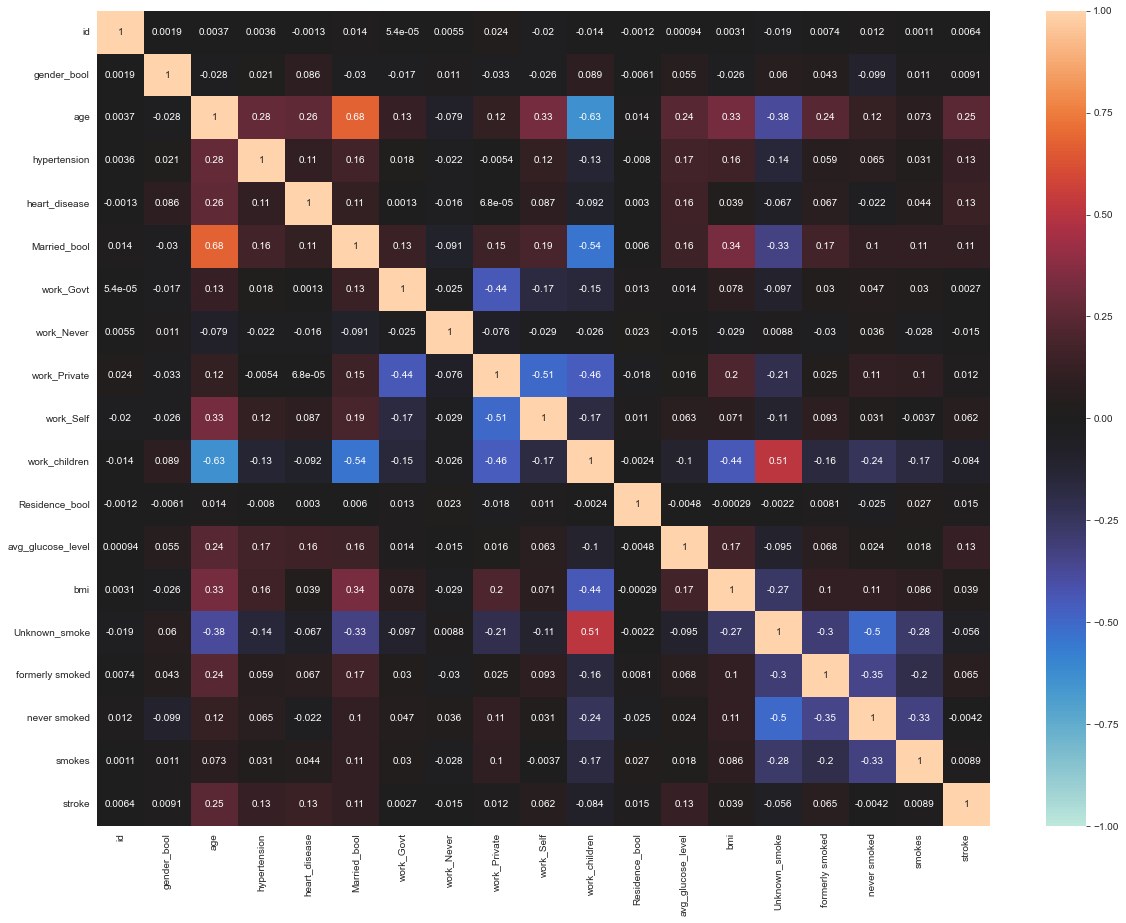

In [245]:
""" Correlation Matrix with Heatmap """
plt.figure(figsize=(20, 15))
filtered_df=df.loc[:,df.columns!="index"]
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, annot=True)

**The above correlation matrix is showing there is a stronger correlation between Age and Stroke.**

**A closer look at the column Stroke and its relative size between stroke and non-stroke**

<AxesSubplot:xlabel='stroke', ylabel='count'>

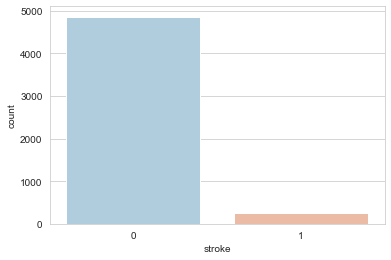

In [209]:
sns.set_style('whitegrid')
sns.countplot(x='stroke', data=df, palette='RdBu_r')


In [210]:
df.stroke.value_counts() # shows the number of records between stroke and non-stroke

0    4860
1     249
Name: stroke, dtype: int64

**From above we notice there is an imbalance data between the stroke and non-stroke cases.**

**Using SMOTE (Synthetic Minority Over-sampling Technique) to increase(oversample) the target varaible**

In [211]:
#df['gender'] = df['gender'].astype('category')
#print(df.dtypes)

df.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status'], axis=1, inplace=True)

In [212]:
df.head()

,gender_bool,age,hypertension,heart_disease,Married_bool,work_Govt,work_Never,work_Private,work_Self,work_children,Residence_bool,avg_glucose_level,bmi,Unknown_smoke,formerly smoked,never smoked,smokes,stroke
0,1,0.816895,0,1,1,0,0,1,0,0,1,0.801265,36.60000,0,1,0,0,1
1,0,0.743652,0,0,1,0,0,0,1,0,0,0.679023,28.89456,0,0,1,0,1
2,1,0.975586,0,1,1,0,0,1,0,0,0,0.234512,32.50000,0,0,1,0,1
3,0,0.597168,0,0,1,0,0,1,0,0,1,0.536008,34.40000,0,0,0,1,1
4,0,0.963379,1,0,1,0,0,0,1,0,0,0.549349,24.00000,0,0,1,0,1


In [213]:
from imblearn.over_sampling import SMOTE
from colorama import Fore, Back, Style #change strings color 

#sepate labels and target
X = df.drop(columns = ['stroke'])
#target
y = df['stroke']

#oversample data
smote = SMOTE(random_state=42)
X , y = smote.fit_resample(X,y)

before = df.stroke.value_counts(normalize=True)
after = y.value_counts(normalize=True)
print(Fore.BLACK + 'Rows before smote:' + Fore.GREEN + ' {}'.format(df.shape[0]))
print(Fore.BLACK + 'Rows after smote:' + Fore.GREEN + ' {}'.format(X.shape[0]))

Rows before smote: 5109
Rows after smote: 9720


In [214]:
#X.value_counts() # shows the number of records between stroke and non-stroke
X.head(10)

,gender_bool,age,hypertension,heart_disease,Married_bool,work_Govt,work_Never,work_Private,work_Self,work_children,Residence_bool,avg_glucose_level,bmi,Unknown_smoke,formerly smoked,never smoked,smokes
0,1,0.816895,0,1,1,0,0,1,0,0,1,0.801265,36.60000,0,1,0,0
1,0,0.743652,0,0,1,0,0,0,1,0,0,0.679023,28.89456,0,0,1,0
2,1,0.975586,0,1,1,0,0,1,0,0,0,0.234512,32.50000,0,0,1,0
3,0,0.597168,0,0,1,0,0,1,0,0,1,0.536008,34.40000,0,0,0,1
4,0,0.963379,1,0,1,0,0,0,1,0,0,0.549349,24.00000,0,0,1,0
5,1,0.987793,0,0,1,0,0,1,0,0,1,0.605161,29.00000,0,1,0,0
6,1,0.902344,1,1,1,0,0,1,0,0,0,0.069107,27.40000,0,0,1,0
7,0,0.841309,0,0,0,0,0,1,0,0,1,0.181285,22.80000,0,0,1,0
8,0,0.719238,0,0,1,0,0,1,0,0,0,0.097082,28.89456,1,0,0,0
9,0,0.951172,0,0,1,0,0,1,0,0,1,0.015927,24.20000,1,0,0,0


<AxesSubplot:xlabel='stroke', ylabel='count'>

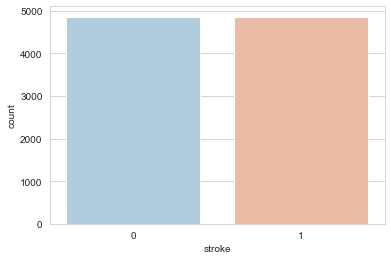

In [215]:
sns.set_style('whitegrid')
sns.countplot(x=y, data=X, palette='RdBu_r')

In [216]:
y.value_counts() # shows the number of records between stroke and non-stroke

1    4860
0    4860
Name: stroke, dtype: int64

**Select input attributes for our prediction on Stroke**

In [217]:
X = X[["age","hypertension","heart_disease","Married_bool", "avg_glucose_level"]]
X

,age,hypertension,heart_disease,Married_bool,avg_glucose_level
0,0.816895,0,1,1,0.801265
1,0.743652,0,0,1,0.679023
2,0.975586,0,1,1,0.234512
3,0.597168,0,0,1,0.536008
4,0.963379,1,0,1,0.549349
...,...,...,...,...,...
9715,0.782172,0,0,1,0.260321
9716,0.967146,0,0,1,0.449616
9717,0.843450,0,0,0,0.843633
9718,0.922121,0,0,1,0.926597


In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, 
                                                    random_state=111)

In [219]:
from sklearn import linear_model

#Step 1: Create Model Object
model = linear_model.LogisticRegression(max_iter=1000)

#Step 2: Perform Fit
model.fit(X_train,y_train)
#print(X_test)

#Step 3: Perform Predictions on Test Set
y_pred=model.predict(X_test)
#print(y_pred)

#Step 4: Compute Evaluation Metrics (Create Confusion Matrix + Calculate Accuracy Score)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

result=confusion_matrix(y_test,y_pred)
print("ConfusionMatrix:")
print(result)
print()

result1=accuracy_score(y_test,y_pred)
print("Accuracy:",result1)
print()

#Step 5: Derive Accuracy, Pecision and Recall (Classfication Report)
result2=classification_report(y_test,y_pred)
print("ClassificationReport:")
print(result2)

ConfusionMatrix:
[[1078  363]
 [ 225 1250]]

Accuracy: 0.7983539094650206

ClassificationReport:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1441
           1       0.77      0.85      0.81      1475

    accuracy                           0.80      2916
   macro avg       0.80      0.80      0.80      2916
weighted avg       0.80      0.80      0.80      2916

